### Support Vector Machine
<hr>

In [7]:
# Preamble: Import libraries
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn import svm

In [8]:
# Reference http://scikit-learn.org/stable/modules/svm.html

In [9]:
# Replace categoricals and boolean variables in data frame
def transform_df(df):
    df =df.drop(df.columns[0],axis=1) # drop panda indexing column
    
    #df= df.drop('Over18',axis=1)
    
    # One Hot encoding for categorical variables
    categoricals = ['BusinessTravel','Department', 'EducationField','JobRole','MaritalStatus']
    for item in categoricals:
        dummy = pd.get_dummies(df[item], prefix=item)
        df = df.join(dummy.loc[:, :])
        df = df.drop(item, axis=1)
        
    #Transform boolean values into numbers
    df['Attrition'] = df['Attrition'].map(lambda x: 0 if x == 'No' else 1)
    df['OverTime'] = df['OverTime'].map(lambda x: 0 if x == 'No' else 1)
    df['Gender'] = df['Gender'].map(lambda x: 0 if x== 'Female' else 1)
    df['Over18'] = df['Over18'].map(lambda x: 0 if x=='N' else 1)
    return df

In [10]:
# Normalize data before training the model
from sklearn.preprocessing import StandardScaler

# Create training and test sets
train_set = pd.read_csv("trainEmployeeData.csv")
test_set = pd.read_csv("testEmployeeData.csv")

# Apply transformation
train_set = transform_df(train_set)
test_set = transform_df(test_set)

y_train = train_set['Attrition']
x_train = train_set.drop(['Attrition', 'Over18'], axis=1)


scalerTrain = StandardScaler()
scalerTrain.fit(x_train)
x_train = scalerTrain.transform(x_train) #normalize

y_test = test_set['Attrition']
x_test = test_set.drop(['Attrition', 'Over18'], axis=1)

scalerTest = StandardScaler()
scalerTest.fit(x_test)
x_test = scalerTest.transform(x_test) #normalize

In [6]:
param_grid = [
  {'C': [0.1, 1, 10, 100], 'gamma': [  0.1, 0.01, 0.001, 0.0001],'degree': [0.1, 1, 2,3], 'kernel': ['poly']},
  {'C': [0.1, 1, 10, 100], 'gamma': [ 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
]

svc = svm.SVC()
clf = GridSearchCV(svc, param_grid, verbose = 1, cv  = 5)
clf.fit(x_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [57]:
clf.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}

In [58]:
clf.cv_results_['mean_test_score']

array([ 0.83758503,  0.83758503,  0.83758503,  0.83758503,  0.83758503,
        0.88010204,  0.85034014,  0.83758503,  0.83758503,  0.83758503,
        0.76870748,  0.82738095,  0.83758503,  0.83758503,  0.83758503,
        0.8452381 ,  0.84438776,  0.83758503,  0.83758503,  0.83758503,
        0.83758503,  0.83758503,  0.83758503,  0.83758503,  0.83758503,
        0.88010204,  0.88010204,  0.85034014,  0.83758503,  0.83758503,
        0.76870748,  0.76615646,  0.83843537,  0.83758503,  0.83758503,
        0.8452381 ,  0.8452381 ,  0.83758503,  0.83758503,  0.83758503,
        0.83758503,  0.83758503,  0.83758503,  0.83758503,  0.83758503,
        0.87840136,  0.88010204,  0.88010204,  0.85034014,  0.83758503,
        0.76870748,  0.76870748,  0.82738095,  0.83758503,  0.83758503,
        0.8452381 ,  0.8452381 ,  0.85204082,  0.83758503,  0.83758503,
        0.83758503,  0.83758503,  0.83758503,  0.83758503,  0.83758503,
        0.87755102,  0.87840136,  0.88010204,  0.88010204,  0.85

In [103]:
# C = 0.1, degree  = 1, gamma = 0.1, kernel = poly
svmP = svm.SVC(C = 0.1, degree = 1, gamma = 0.1,kernel = 'poly');
svmP.fit(x_train,y_train);
svmP.predict(x_test)
print ("Kernel = Poly, C = 0.1, degree = 1, gamma = 0.1")
print("Training Accuracy: ", svmP.score(x_train, y_train))
print("Test Accuracy: ", svmP.score(x_test,y_test))

Kernel = Poly, C = 0.1, degree = 1, gamma = 0.1
Training Accuracy:  0.863095238095
Test Accuracy:  0.867346938776


In [106]:
# C = 1,  kernel = Linear
svmL = svm.SVC(C = 1, kernel =  'linear');
svmL.fit(x_train,y_train);
svmL.predict(x_test)
print ("Kernel = Linear, C = 1")
print("Training Accuracy: ", svmL.score(x_train, y_train))
print("Test Accuracy: ", svmL.score(x_test,y_test))

Kernel = Linear, C = 1
Training Accuracy:  0.893707482993
Test Accuracy:  0.887755102041


[-0.24835895 -0.04312592  0.18049657  0.02726934  0.         -0.06219037
 -0.28681177  0.07326894  0.05443463 -0.26556571 -0.1751537  -0.31970323
  0.00288728  0.00581326  0.29202691  0.55022622 -0.06457925  0.04360013
 -0.1566064   0.         -0.15354679 -0.35152645 -0.16422962 -0.1398936
  0.18807149 -0.19999222  0.31447105 -0.25785419 -0.12548778  0.16820444
 -0.06332309  0.01827077 -0.0270933   0.01971197  0.04256017  0.00171408
  0.02163994 -0.07580407 -0.02499768  0.09750624 -0.044363    0.02032785
  0.11000262  0.06789751 -0.12505761 -0.11497528 -0.10515112  0.05368726
  0.14456548 -0.05058778 -0.09281178  0.14386486]


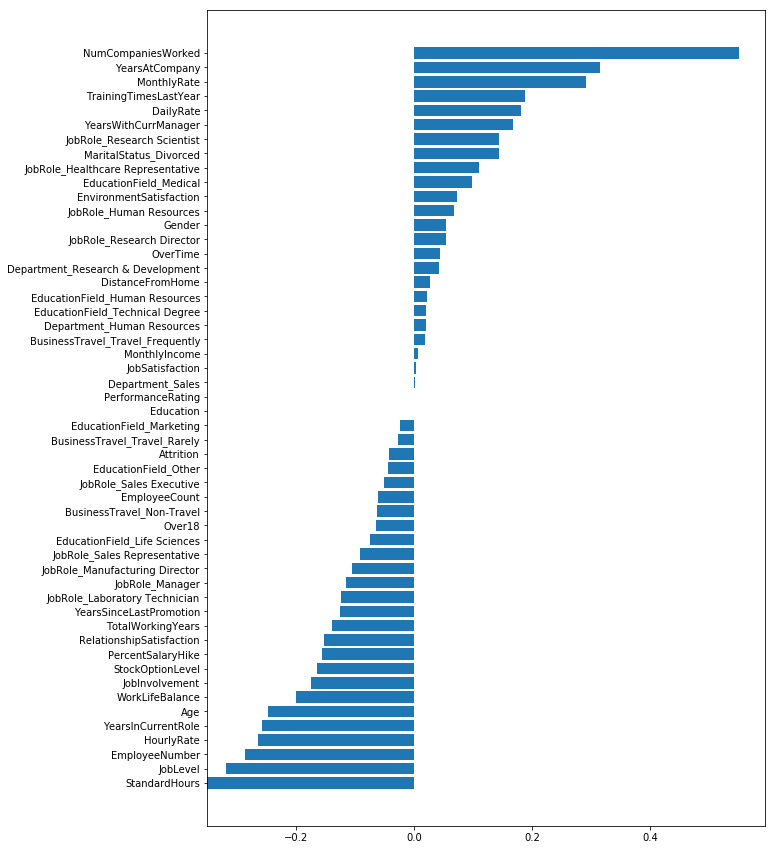

In [13]:
from matplotlib import pyplot as plt
from sklearn import svm

plt.figure(figsize = (10,15))
def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    n = len(names)
    plt.barh(range(n), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = train_set.columns.values
svmL = svm.SVC(C = 0.1, kernel='linear')
svmL.fit(x_train, y_train)
f_importances(svmL.coef_, features_names)

In [109]:
coef = [abs(item) for sublist in svmL.coef_ for item in sublist] #flatten model.coef_

feats = pd.read_csv("trainEmployeeData.csv")
feats = transform_df(feats)
feats = feats.drop(['Attrition'], axis=1)

for idx, val in enumerate(coef):
    print(feats.columns[idx],val)

Age 0.248358946254
DailyRate 0.0431259167849
DistanceFromHome 0.180496573323
Education 0.0272693415717
EmployeeCount 0.0
EmployeeNumber 0.0621903650456
EnvironmentSatisfaction 0.286811766941
Gender 0.0732689441616
HourlyRate 0.0544346337582
JobInvolvement 0.265565714901
JobLevel 0.17515370426
JobSatisfaction 0.319703230228
MonthlyIncome 0.0028872849159
MonthlyRate 0.00581326090652
NumCompaniesWorked 0.292026909345
Over18 0.550226224759
OverTime 0.064579245413
PercentSalaryHike 0.0436001331666
PerformanceRating 0.156606395345
RelationshipSatisfaction 0.0
StandardHours 0.153546786602
StockOptionLevel 0.351526447096
TotalWorkingYears 0.164229617499
TrainingTimesLastYear 0.139893596994
WorkLifeBalance 0.188071487952
YearsAtCompany 0.199992216203
YearsInCurrentRole 0.314471045382
YearsSinceLastPromotion 0.257854190669
YearsWithCurrManager 0.12548778045
BusinessTravel_Non-Travel 0.168204444183
BusinessTravel_Travel_Frequently 0.0633230868168
BusinessTravel_Travel_Rarely 0.0182707657769
Depar

In [63]:
# C = 1, degree  = 1, gamma = 0.1, kernel = poly
svmC = svm.SVC(C = 1, degree = 1, gamma = 0.1,kernel = 'poly');
svmC.fit(x_train,y_train);
svmC.predict(x_test)
print ("Kernel = Poly, C = 1, degree = 1, gamma = 0.1")
print("Training Accuracy: ", svmC.score(x_train, y_train))
print("Test Accuracy: ", svmC.score(x_test,y_test))

Kernel = Poly, C = 1, degree = 1, gamma = 0.1
Training Accuracy:  0.894557823129
Test Accuracy:  0.884353741497


In [68]:
# C = 1,  kernel = linear
svmC = svm.SVC(C = 1,kernel = 'linear');
svmC.fit(x_train,y_train);
svmC.predict(x_test)
print ("Kernel = Linear, C = 1")
print("Training Accuracy: ", svmC.score(x_train, y_train))
print("Test Accuracy: ", svmC.score(x_test,y_test))

Kernel = Linear, C = 1
Training Accuracy:  0.893707482993
Test Accuracy:  0.887755102041
